In [1]:
import os, sys
userpath = "/home/dreuter"
basepath = os.path.join(userpath,"Github","python-paths")
scriptpath = os.path.join(basepath,'crime')
os.chdir(scriptpath)
print(os.getcwd())

credpath = os.path.join(userpath,".cred")
sys.path.append(credpath)
import rcred

/home/dreuter/Github/python-paths/crime


In [2]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

sqlengine = create_engine(
    'mysql+pymysql://{user}:{pw}@{host}/{db}'.format(user = rcred.user, 
                                                            pw = rcred.passwd, 
                                                            host = rcred.host, 
                                                            db = rcred.db), 
                                                            pool_recycle=3600)
sqlconnect = sqlengine.connect()

In [3]:
sqltable1 = "crime_latest"
sqltable2 = "offense_codes"

df = pd.read_sql('SELECT * FROM {table}'.format(table = sqltable1),
                  sqlconnect,
                  index_col="index")

codes = pd.read_sql('SELECT * FROM {table}'.format(table = sqltable2),
                     sqlconnect,
                     index_col="index")
sqlconnect.close()

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
index,,,,,,,,,,,,,,,,,
0,I192066149,3125,Warrant Arrests,WARRANT ARREST,None,,None,2019-08-21 21:31:00,2019,8,Wednesday,21,Part Three,None,NaN,NaN,"(0.00000000, 0.00000000)"
1,I192066145,3106,Property Related Damage,PROPERTY - ACCIDENTAL DAMAGE,E18,556,None,2019-08-21 20:09:00,2019,8,Wednesday,20,Part Three,PINEDALE RD,42.276850,-71.121707,"(42.27684989, -71.12170659)"
2,I192066142,3301,Verbal Disputes,VERBAL DISPUTE,C11,347,None,2019-08-21 21:08:00,2019,8,Wednesday,21,Part Three,EAST ST,42.307611,-71.059706,"(42.30761110, -71.05970561)"
3,I192066140,3115,Investigate Person,INVESTIGATE PERSON,B2,311,None,2019-08-21 20:52:00,2019,8,Wednesday,20,Part Three,WARREN ST,42.319408,-71.081405,"(42.31940816, -71.08140505)"
4,I192066139,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,D14,763,None,2019-08-21 20:28:00,2019,8,Wednesday,20,Part Two,WASHINGTON ST,42.349037,-71.157480,"(42.34903684, -71.15747989)"


In [4]:
codes.head()

,CODE,NAME
index,,
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414949 entries, 0 to 414948
Data columns (total 17 columns):
INCIDENT_NUMBER        414949 non-null object
OFFENSE_CODE           414949 non-null int64
OFFENSE_CODE_GROUP     414949 non-null object
OFFENSE_DESCRIPTION    414949 non-null object
DISTRICT               412798 non-null object
REPORTING_AREA         414949 non-null object
SHOOTING               1712 non-null object
OCCURRED_ON_DATE       414949 non-null datetime64[ns]
YEAR                   414949 non-null int64
MONTH                  414949 non-null int64
DAY_OF_WEEK            414949 non-null object
HOUR                   414949 non-null int64
UCR_PART               414840 non-null object
STREET                 402740 non-null object
Lat                    388096 non-null float64
Long                   388096 non-null float64
Location               414949 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 57.0+ MB


In [6]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,414949.000000,414949.000000,414949.000000,414949.000000,388096.000000,388096.000000
mean,2327.959530,2017.038258,6.589938,13.114891,42.218658,-70.915559
std,1181.480299,1.260511,3.305795,6.296153,2.115002,3.421214
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297156,-71.097163
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077562
75%,3201.000000,2018.000000,9.000000,18.000000,42.348548,-71.062583
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


In [7]:
import numpy as np

In [8]:
shootrows = (df["SHOOTING"] == 'Y')

In [9]:
shootrows.describe()

count     414949
unique         2
top        False
freq      413237
Name: SHOOTING, dtype: object

In [10]:
df_copy = df.copy()

In [11]:
df_copy["SHOOTING"] = list(map(lambda x : int(x), shootrows))

In [12]:
df_copy["SHOOTING"].describe()

count    414949.000000
mean          0.004126
std           0.064100
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SHOOTING, dtype: float64

In [13]:
number_of_shootings = np.sum(df_copy["SHOOTING"])
total_events = len(df_copy["SHOOTING"])

In [14]:
(number_of_shootings/total_events) * 100

0.4125808231854999

In [15]:
df_shootonly = df_copy[shootrows].copy()

In [16]:
df_shootonly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 856 to 413993
Data columns (total 17 columns):
INCIDENT_NUMBER        1712 non-null object
OFFENSE_CODE           1712 non-null int64
OFFENSE_CODE_GROUP     1712 non-null object
OFFENSE_DESCRIPTION    1712 non-null object
DISTRICT               1710 non-null object
REPORTING_AREA         1712 non-null object
SHOOTING               1712 non-null int64
OCCURRED_ON_DATE       1712 non-null datetime64[ns]
YEAR                   1712 non-null int64
MONTH                  1712 non-null int64
DAY_OF_WEEK            1712 non-null object
HOUR                   1712 non-null int64
UCR_PART               1702 non-null object
STREET                 1683 non-null object
Lat                    1659 non-null float64
Long                   1659 non-null float64
Location               1712 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(9)
memory usage: 240.8+ KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(rc={'figure.figsize':(16, 9),
            'figure.dpi':100})

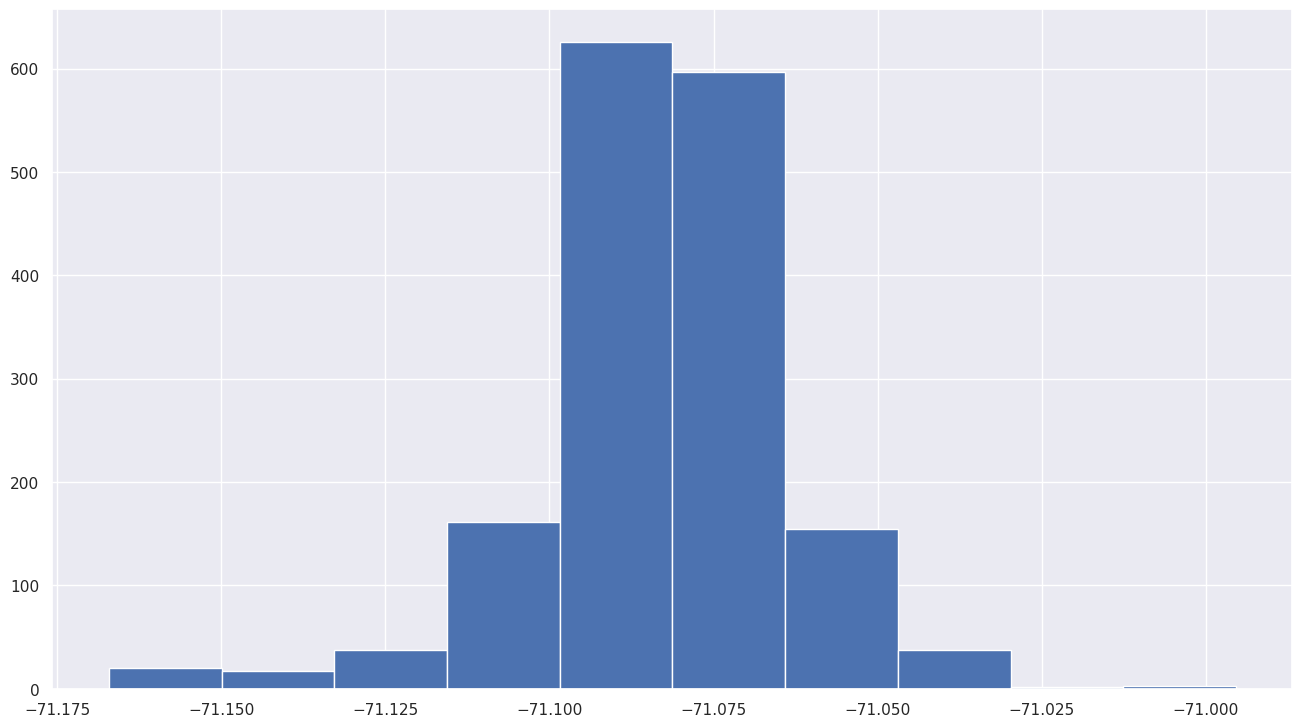

In [19]:
df_shootonly["Long"][(df_shootonly["Long"] < -1)].hist()

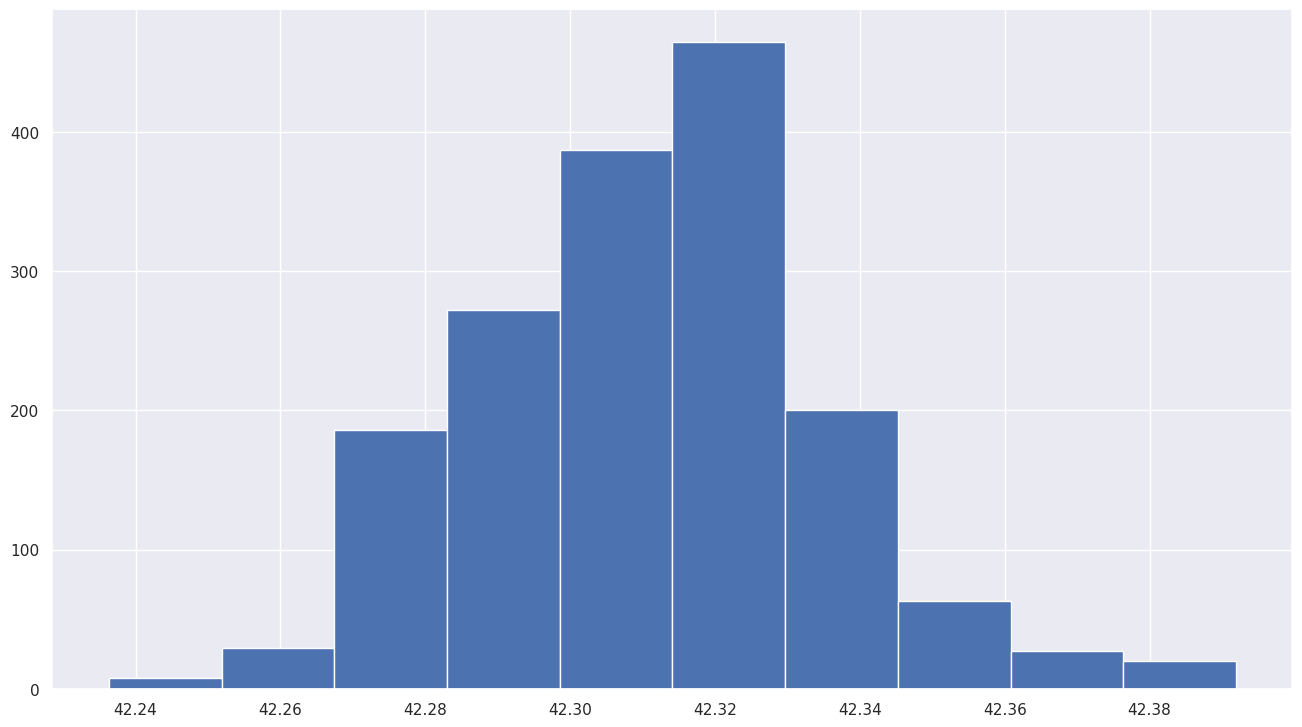

In [20]:
df_shootonly["Lat"][(df_shootonly["Lat"] > 1)].hist()

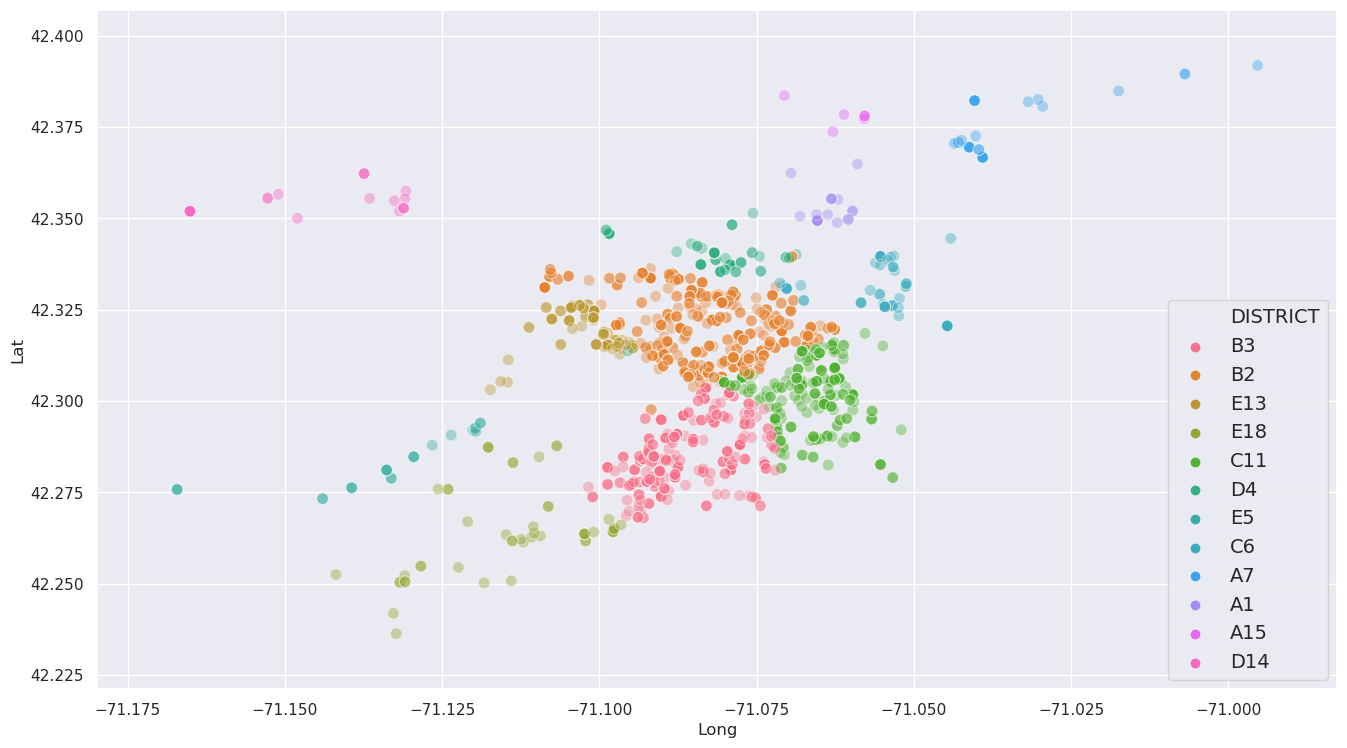

In [62]:
plot = sns.scatterplot(x = df_shootonly["Long"][(df_shootonly["Long"] < -1)], 
                       y = df_shootonly["Lat"][(df_shootonly["Lat"] > 1)], 
                       hue = df_shootonly["DISTRICT"],
                       s = 70,
                       alpha=0.4
                      )
plot.legend(prop={'size': 14})

Text(0.5, 1.0, 'NUMBER OF SHOOTINGS FOR EVERY DISTRICT')

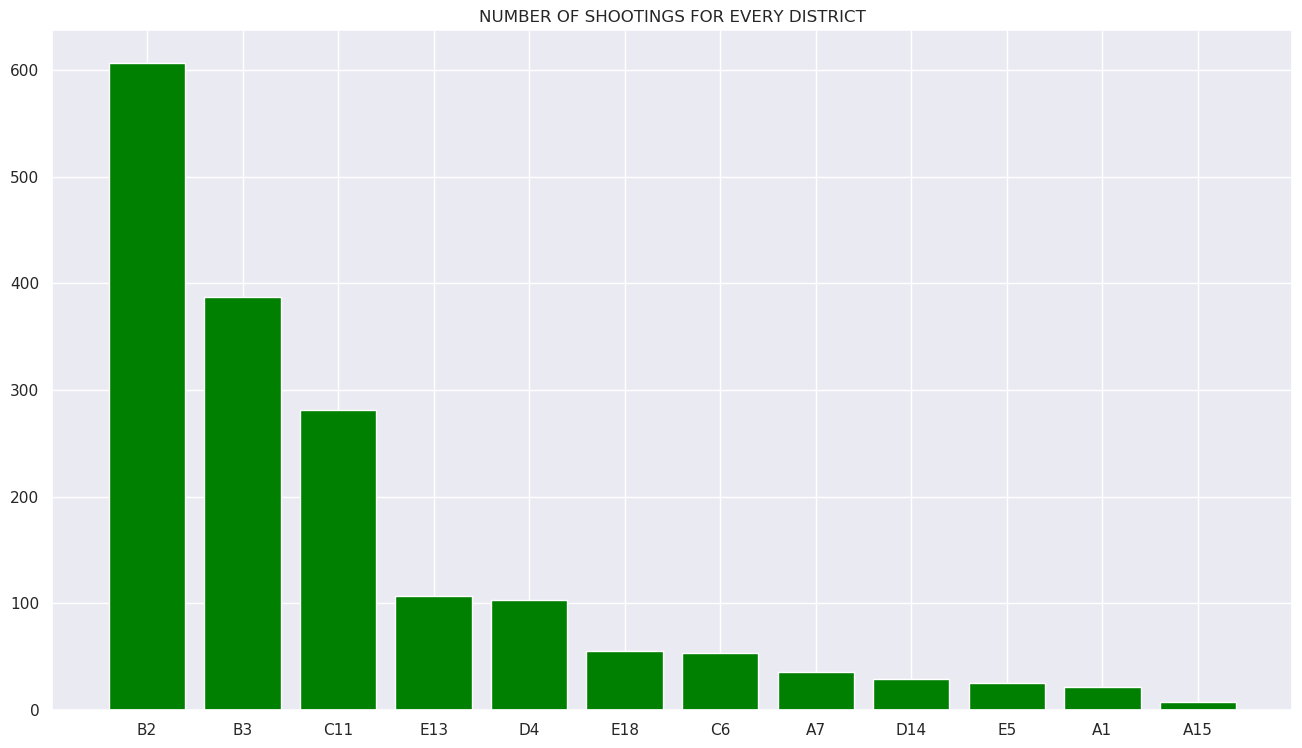

In [34]:
distr_shots = df_shootonly["DISTRICT"].value_counts().index
distr_shots_counts = df_shootonly["DISTRICT"].value_counts()
plt.bar(distr_shots, distr_shots_counts, color="green")
plt.title("NUMBER OF SHOOTINGS FOR EVERY DISTRICTS")

Text(0.5, 1.0, 'NUMBER OF SHOOTINGS FOR EVERY OFFENSE_DESCRIPTION')

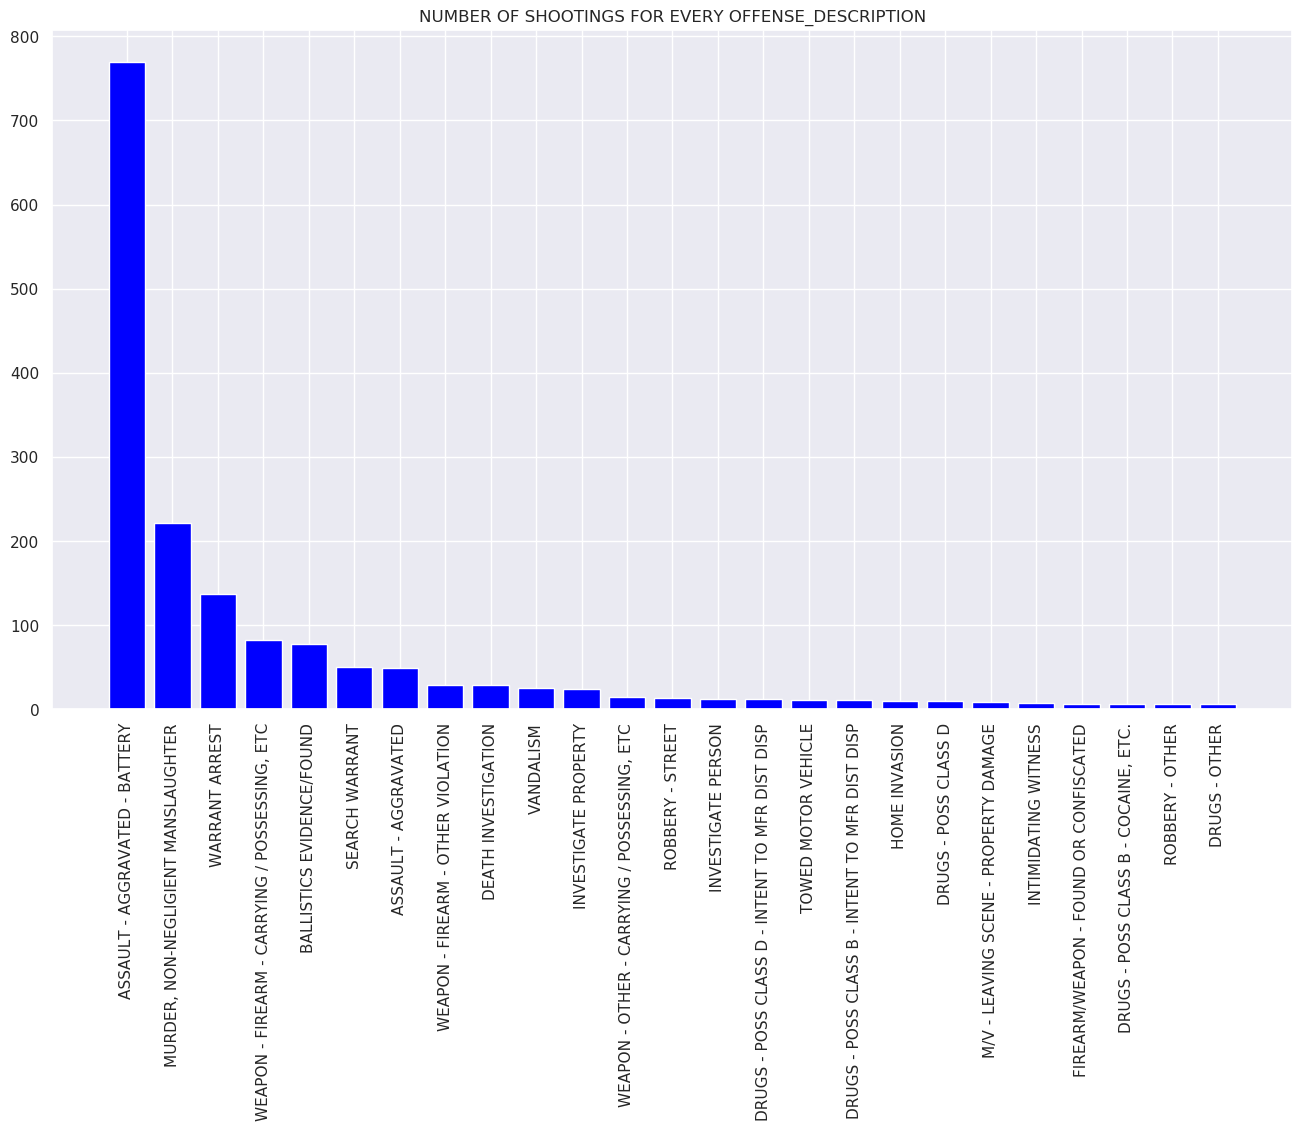

In [36]:
off_dscr = np.array(list(df_shootonly["OFFENSE_DESCRIPTION"].value_counts().index))
off_dscr_count = np.array(list(df_shootonly["OFFENSE_DESCRIPTION"].value_counts()))
fiveplus = (off_dscr_count > 5)
plt.xticks(rotation="vertical")
plot = plt.bar(off_dscr[fiveplus],off_dscr_count[fiveplus],color='blue')
plt.title("NUMBER OF SHOOTINGS FOR EVERY OFFENSE_DESCRIPTION")

Text(0.5, 1.0, 'NUMBER OF SHOOTINGS FOR EVERY OFFENSE_CODE_GROUP')

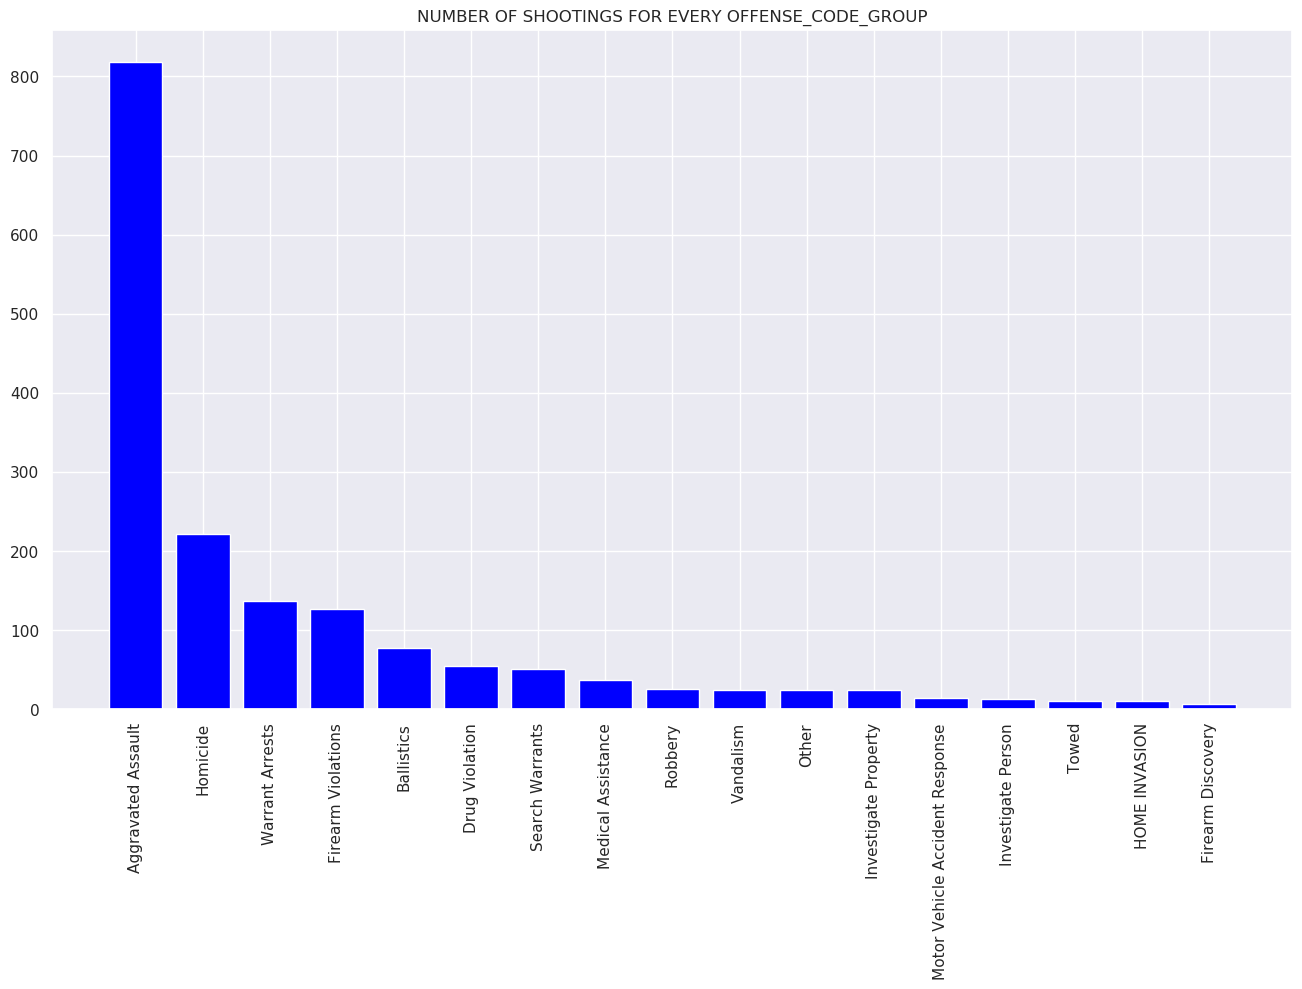

In [35]:
off_cg = np.array(list(df_shootonly["OFFENSE_CODE_GROUP"].value_counts().index))
off_cg_count = np.array(list(df_shootonly["OFFENSE_CODE_GROUP"].value_counts()))
fiveplus = (off_cg_count > 5)
plt.xticks(rotation="vertical")
plot = plt.bar(off_cg[fiveplus],off_cg_count[fiveplus],color='blue')
plt.title("NUMBER OF SHOOTINGS FOR EVERY OFFENSE_CODE_GROUP")